In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
def get_signal(code,k):
    temp=code
    len_symbol = 6*int(5e-6/4e-9)
    print(len_symbol)
    arr=np.sin(np.arange(len_symbol)*2*np.pi*k/4096) #k is channel number in 250 MSPS 4096 convention
    signal=np.zeros((16,len_symbol),dtype='float64')
    for i in range(16):
            # print((temp&(2**15))>>15)
#             signal[i,:] = arr * (2*((temp&(2**15))>>15)-1) #there's an ambiguitiy here
            signal[i,:] = (temp&(2**15))>>15 #there's an ambiguitiy here
            temp<<=1
    # plt.plot(np.ravel(signal));plt.show();
    return np.ravel(signal)

In [13]:
code1=0x121D
code2=0x12E2
k=121
print(code1)
s1=get_signal(code2,k)

4637
7500


In [25]:
template=s1.copy()

In [52]:
sft=np.fft.rfft(s1)

In [26]:
len(s1)

120000

In [23]:
121*len(s1)/4096

3544.921875

(2544.0, 4544.0)

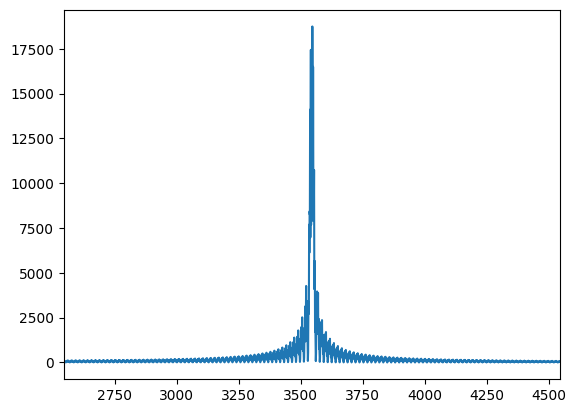

In [28]:
plt.plot(np.abs(sft))
center=3544

plt.xlim(center-1000,center+1000)

In [81]:
Ift=np.fft.rfft(np.cos(np.arange(len(s1))*2*np.pi*k/4096)*s1)
Ift[1000:]=0
I=np.fft.irfft(Ift)
Qft=np.fft.rfft(np.sin(np.arange(len(s1))*2*np.pi*k/4096)*s1)
Qft[1000:]=0
Q=np.fft.irfft(Qft)

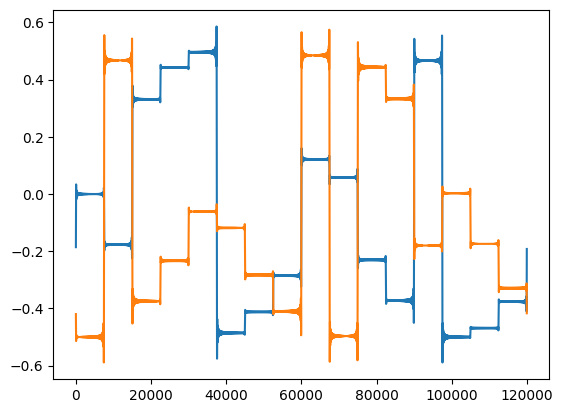

In [58]:
plt.plot(I)
plt.plot(Q)

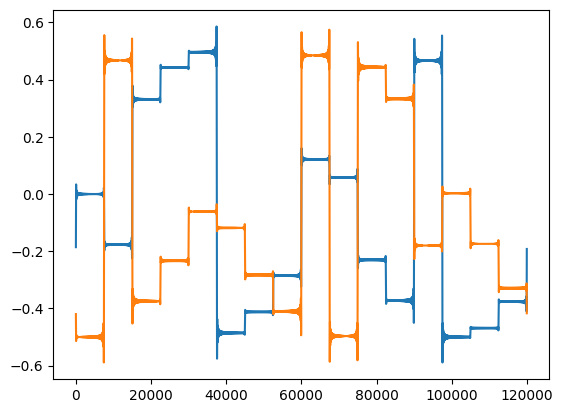

In [84]:
plt.plot(I)
plt.plot(Q)

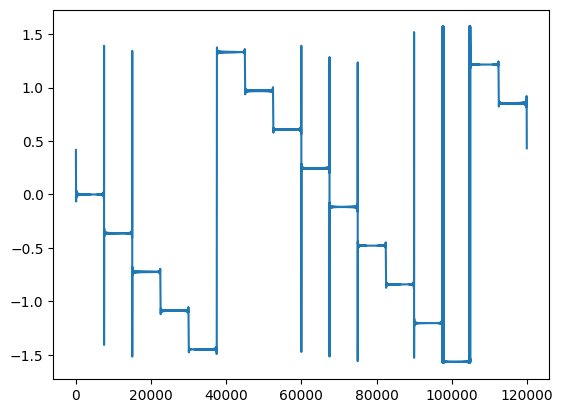

In [86]:
plt.plot(np.arctan(I/Q))

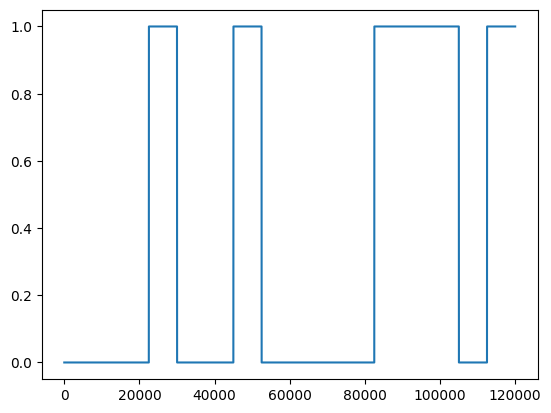

In [45]:
plt.plot(template)

(0.0, 100.0)

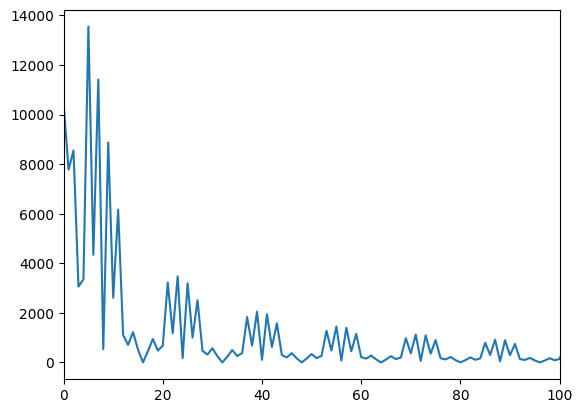

In [47]:
plt.plot(np.abs(np.fft.rfft(I)))
plt.xlim(0,100)

(0.0, 100.0)

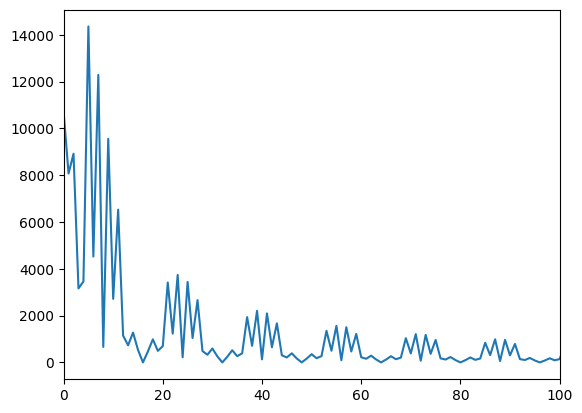

In [48]:
plt.plot(np.abs(np.fft.rfft(Q)))
plt.xlim(0,100)

In [49]:
np.abs(np.fft.rfft(Q))

array([1.07020480e+04, 8.07351490e+03, 8.91739381e+03, ...,
       9.09494702e-13, 5.08422995e-13, 0.00000000e+00])

In [50]:
np.abs(np.fft.rfft(I))

array([1.04430160e+04, 7.77696738e+03, 8.55200982e+03, ...,
       0.00000000e+00, 9.09494702e-13, 0.00000000e+00])

In [62]:
1/3372910

2.9647989421597377e-07

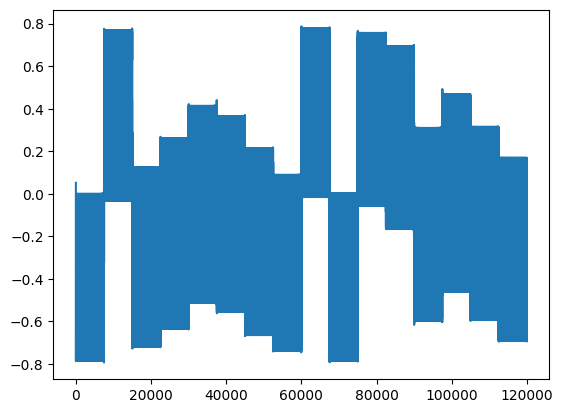

In [63]:
plt.plot(I)

In [52]:
sig=(2*template-1)*np.cos(np.arange(len(s1))*2*np.pi*k/4096)

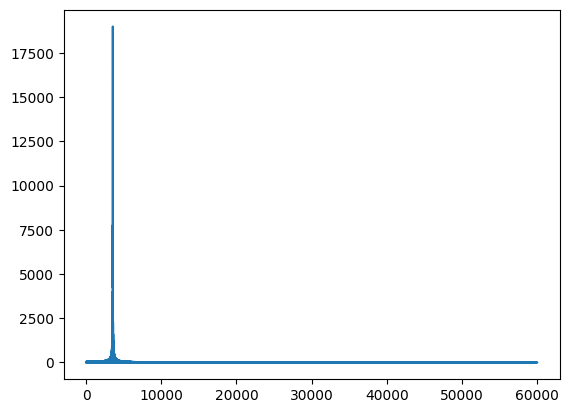

In [53]:
sft=np.fft.rfft(sig)
plt.plot(np.abs(sft))
# plt.xlim(3500,3600)
# plt.xlim(0,100)

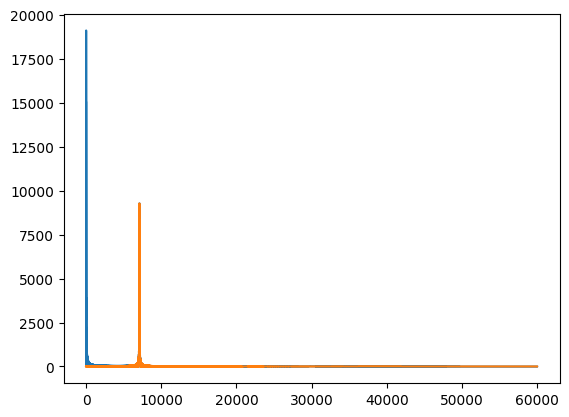

In [55]:
Ift=np.fft.rfft(np.cos(np.arange(len(s1))*2*np.pi*k/4096)*sig)
plt.plot(np.abs(Ift))
Ift[1000:]=0
I=np.fft.irfft(Ift)
Qft=np.fft.rfft(np.sin(np.arange(len(s1))*2*np.pi*k/4096)*sig)
plt.plot(np.abs(Qft))
Qft[1000:]=0
Q=np.fft.irfft(Qft)

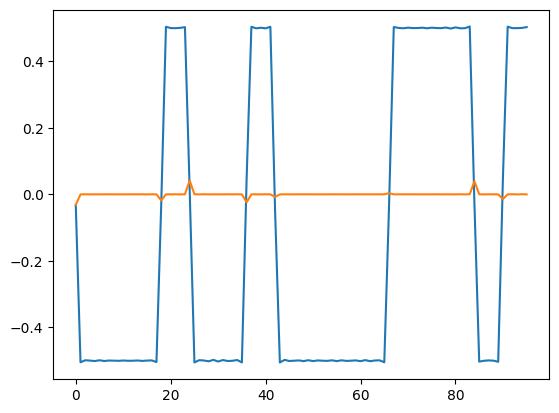

In [56]:
plt.plot(I[::1250])
plt.plot(Q[::1250])

In [51]:
np.tan(3*np.pi/4)

-1.0

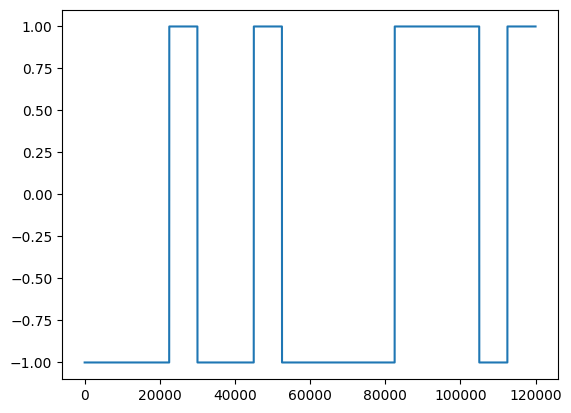

In [47]:
plt.plot((2*template-1))

/tmp/ipykernel_7123/912267349.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  temp[1000-500:1100-500]=I[::1200].copy() + 1j*Q[::1200].copy()


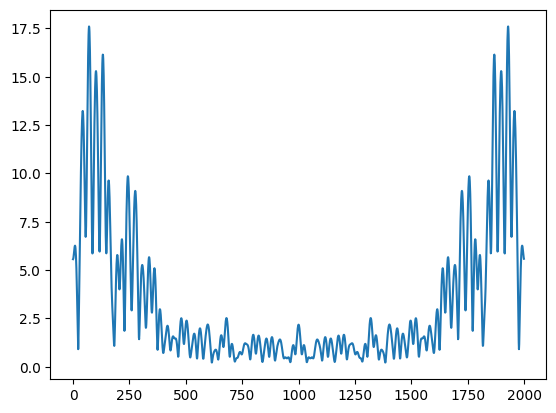

In [31]:
temp=np.zeros(2000)
temp[1000-500:1100-500]=I[::1200].copy() + 1j*Q[::1200].copy()
tempft=np.fft.fft(temp)
plt.plot(np.abs(tempft))

In [127]:
I.shape

(120000,)

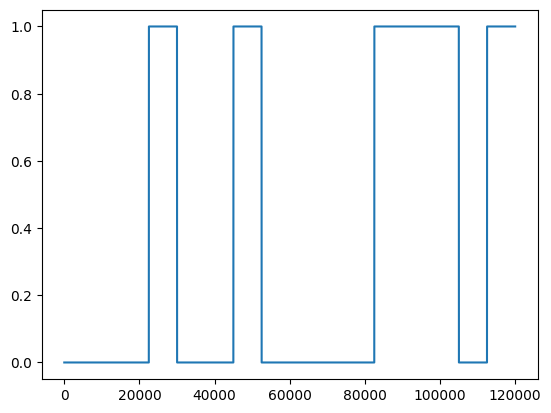

In [102]:
plt.plot(template)

In [103]:
np.correlate(I+1j*Q,template)

array([15874.11960571-15877.08261856j])

In [3]:
infilename = '/home/mohan/Downloads/iono_demo/export.npy'
data = np.load(infilename, allow_pickle=True)
index = data.item()['index']
freq_hz = data.item()['freq_hz']
rx = data.item()['rx']
tx = data.item()['tx']

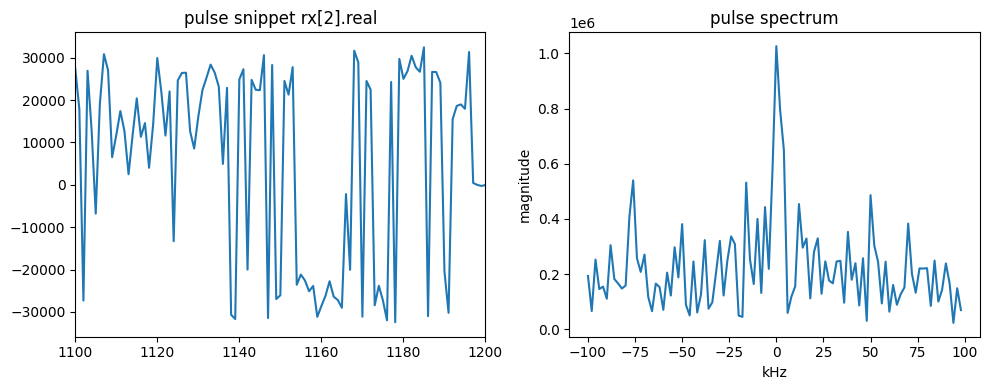

In [57]:
f=plt.gcf()
f.set_size_inches(10,4)
pnum=2
plt.subplot(121)
plt.title(f"pulse snippet rx[{pnum}].real")
plt.plot(np.real(rx[pnum]))
st=1100
en=1200
nn=en-st
plt.xlim(st,en)
plt.subplot(122)
fsamp=1/5e-6
df=fsamp/(en-st)
f=np.fft.fftshift(np.fft.fftfreq(nn)*nn*df)/1e3
plt.title("pulse spectrum")
plt.plot(f,np.fft.fftshift(np.abs(np.fft.fft(rx[pnum][st:en]))))
plt.xlabel("kHz")
plt.ylabel("magnitude")
plt.tight_layout()

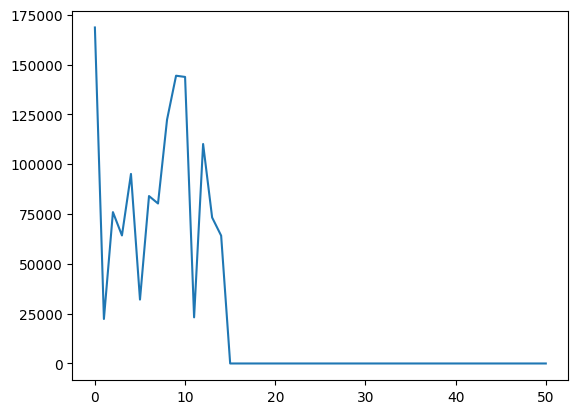

In [71]:
pft=np.fft.rfft(rx[0][st:en].imag)
pft[15:]=0
plt.plot(np.abs(pft))
pnew=np.fft.irfft(pft)
# plt.plot(pnew)

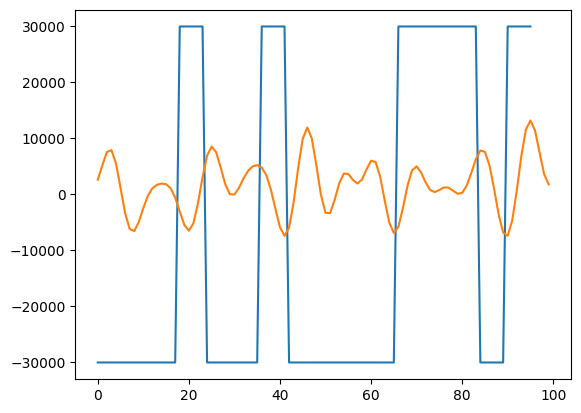

In [72]:
plt.plot(tx[1])
plt.plot(pnew)

Text(0.5, 1.0, 'I Q individual spectra')

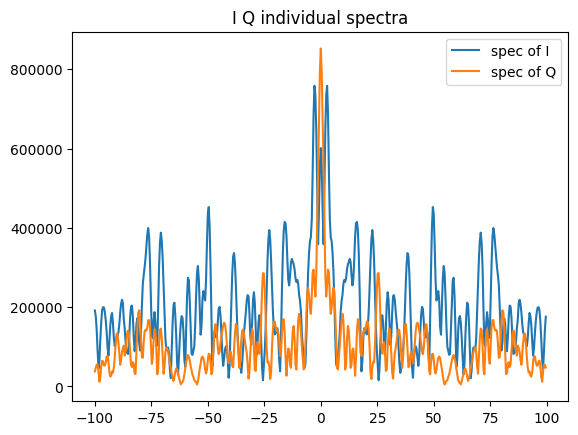

In [7]:
plt.plot(f,np.fft.fftshift(np.abs(np.fft.fft(rx[2][800:1300].real))),label='spec of I')
plt.plot(f,np.fft.fftshift(np.abs(np.fft.fft(rx[2][800:1300].imag))), label='spec of Q')
plt.legend()
plt.title("I Q individual spectra")

ValueError: x and y must have same first dimension, but have shapes (100,) and (500,)

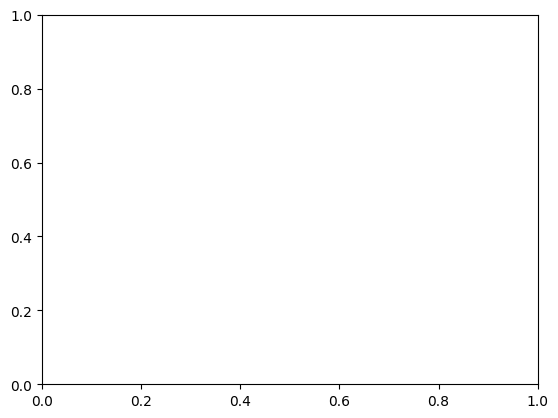

In [21]:
plt.plot(f,np.fft.fftshift(np.abs(np.fft.fft(rx[0][800:1300].imag))))